# House Prices - Kaggle

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [13]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Aqui quere queremos saber quantos valores faltores tem em cada coluna 
missing_count = (df_train.isnull().sum() / len(df_train)) * 100

# Filtraremos somente as colunas na qual a porcentagem de falores faltosos é maior que 0
missing_count = missing_count[missing_count > 0]

missing_count.sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

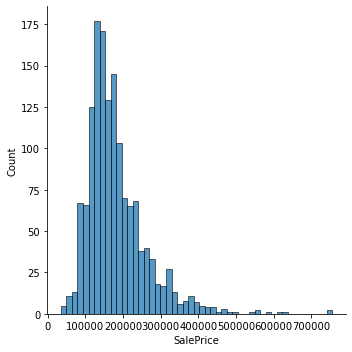

In [18]:
import seaborn as sns 

sns.displot(df_train['SalePrice'])

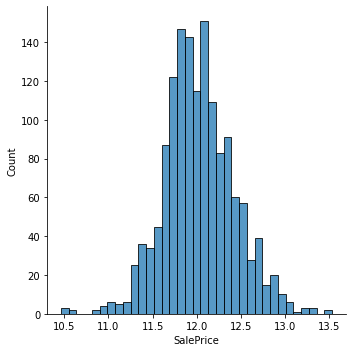

In [19]:
# normalizando nossa coluna alvo.
target = np.log(df_train['SalePrice'])
sns.displot(target)

In [20]:
# encontrando as colunas com tipos numéricos 
numeric_data = df_train.select_dtypes(include = [np.number])

# encontrando as colunas com dados categóricos
gategorical_data = df_train.select_dtypes(exclude = [np.number])

print('Há {0} features numéricas e {1} features categóricas. '.\
     format(numeric_data.shape[1], gategorical_data.shape[1]))

Há 38 features numéricas e 43 features categóricas. 


In [21]:
# a coluna 'Id' não vai acrescentar em nada na nossa análise, antão vamos excluí-la.
del numeric_data['Id']

numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

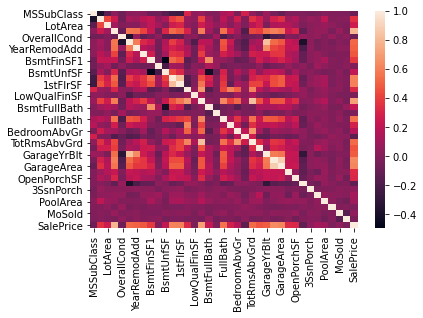

In [22]:
# Vamos gerar um plot de correlação entre as features numericas 
corr = numeric_data.corr()
sns.heatmap(corr)

In [ ]:
df_train.groupby(['YrSold', 'MoSold']).Id.count.plot(kind = 'bar', figsize = (14, 4))
plt.title()